In [97]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import math


dir = './POSTPRO/'
prenom = 'CONTACT_FORCE_DISTRIBUTION_'
coor = 'COORDINATION_NUMBER.DAT'

In [98]:
n = 1000
dt = 1e-3
data_tot = np.zeros((5, n-1))
for i in range(1, n):
    nom = dir + prenom + '0'*int(np.ceil(6-np.log10(i))) + str(i) + '.DAT'
    data = np.loadtxt(nom).reshape(-1,1)
    data = np.vstack((i*dt, data))
    data_tot[:,i-1] = data[:,0]


In [99]:
data_tot_df = pd.DataFrame(data_tot.T, columns=['t', 'Vr', 'Nr', 'Vn', 'Nn'])
fixed_df = data_tot_df[data_tot_df['Vr'] != -math.inf]
fixed_df.head()

,t,Vr,Nr,Vn,Nn
0,0.001,2.101672,186.0,2.154063,186.0
1,0.002,3.117729,136.0,3.166792,136.0
2,0.003,3.126892,106.0,3.136357,106.0
3,0.004,2.720798,74.0,2.764307,74.0
4,0.005,1.884801,66.0,1.940092,66.0


<AxesSubplot:title={'center':'Vr'}, xlabel='t'>

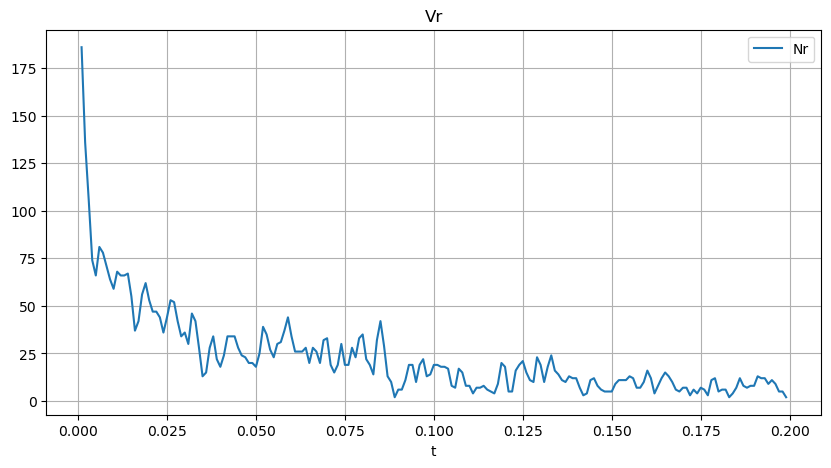

In [100]:
fixed_df[fixed_df['t']<0.2].plot(x='t', y='Nr', figsize=(10,5), grid=True, title='Vr')

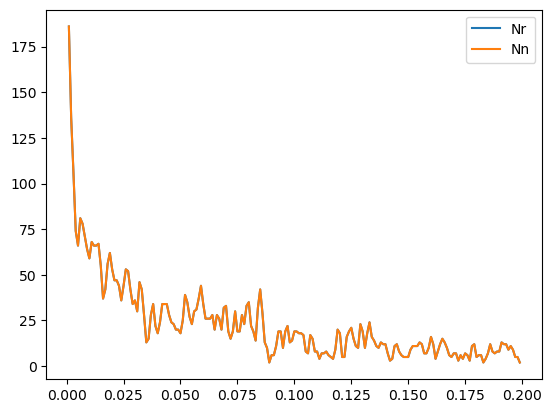

In [101]:
plt.figure()
plt.plot(fixed_df['t'][fixed_df['t']<0.2], fixed_df['Nr'][fixed_df['t']<0.2], label='Nr')
plt.plot(fixed_df['t'][fixed_df['t']<0.2], fixed_df['Nn'][fixed_df['t']<0.2], label='Nn')
plt.legend()

In [107]:
coordination = np.loadtxt(dir+coor)
coordination_df = pd.DataFrame(coordination, columns=['t', 'c_0','c_+', 'c_-', 'c'])

In [108]:
coordination_df.head()

,t,c_0,c_+,c_-,c
0,0.001,5.638514,1.458824,0.0,1.458824
1,0.002,5.665541,1.424084,0.0,1.424084
2,0.003,5.648649,1.350318,0.0,1.350318
3,0.004,5.675676,1.264957,0.0,1.264957
4,0.005,5.631757,1.178572,0.0,1.178572


<AxesSubplot:title={'center':'Coordination number'}, xlabel='t'>

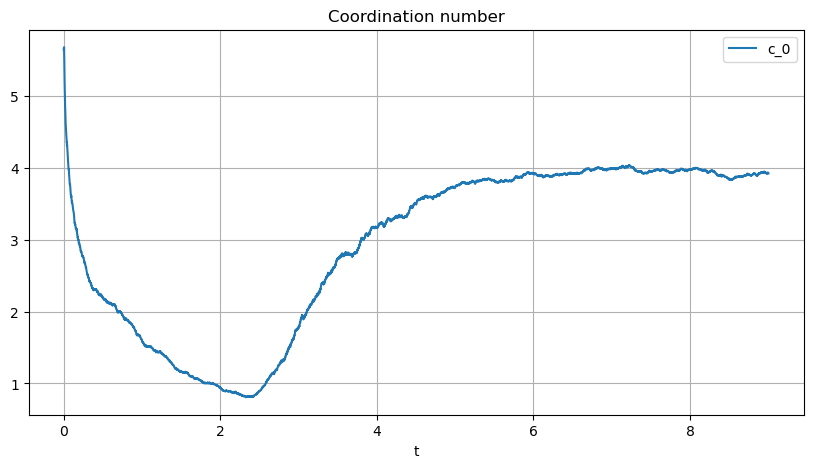

In [110]:
coordination_df.plot(x='t', y='c_0', figsize=(10,5), grid=True, title='Coordination number')

In [3]:
from pylmgc90 import pre
import math

In [4]:
# 3D firstfall
dim = 3

## geometric params
ptype = 'SPHER' # particle type
Rmin = 2 # minimum radius of particles
Rmax = 5 # maximum radius of particles

Px = 30*Rmax # width of the particle generation
Py = 5*Rmax # height of the particle generation
Pz = 10*Rmax # depth of the particle generation

lx = 50*Rmax # width of the domain
ly = 30*Rmax # height of the domain
lz = 30*Rmax # depth of the domain

nb_particles = 300 # number of particles
pp = 0.3 # particle-particle friction
pw = 0.5 # particle-wall friction


## containers definitions:
bodies = pre.avatars() # container for bodies
mats = pre.materials() # container for materials
mods = pre.models() # container for models
svs = pre.see_tables() # container for see tables
tacts = pre.tact_behavs() # container for tact behaviors

## create materials
# print(pre.config.lmgc90dicts.bulkBehavOptions['RIGID'])
tdur = pre.material(name='TDURx', materialType='RIGID', density=1000.)
plex = pre.material(name='PLEXx', materialType='RIGID', density=5.)
mats.addMaterial(tdur,plex)


## create a model of rigid
mod = pre.model(name='rigid',physics='MECAx',element='Rxx3D',dimension=dim)
mods.addModel(mod)

## creation of the walls

down = pre.rigidPlan(axe1=lx/2.,axe2=lz/2.,axe3=Rmax/2.,center=[0.,0.,0.],
                   material=tdur,model=mod,color='WALLx')

down.rotate(description='axis',alpha=math.pi/2.,axis=[1.,0.,0.],center=down.nodes[1].coor)
down.translate(dy=-ly/2.,dz=lz/2.)
bodies.addAvatar(down)


In [14]:
help(down.rotate)

Help on method rotate in module pylmgc90.pre.avatar.avatar:

rotate(description='Euler', phi=0.0, theta=0.0, psi=0.0, alpha=0.0, axis=[0.0, 0.0, 1.0], center=[0.0, 0.0, 0.0]) method of pylmgc90.pre.avatar.avatar.avatar instance
    rotate(self, description='Euler', phi=0., theta=0., psi=0., alpha=0., axis=[0., 0., 1.], center=[0., 0., 0.])
    
    this function rotates the considered avatar, according to the given rotation parameters and a
    rotation center. Supported rotation paramters are: Euler's angles or an axis and an angle
    
    parameters:
    
    - self: the avatar itself
    - description='Euler': defines the rotation parameters:
    
      - if description = 'Euler', the rotation uses Euler's angles, consequently only phi, theta, psi and
        center are considered
      - if description = 'axis', the rotation uses an axis and an angle, consequently only axis, alpha and
        center are considered
    - phi: first Euler's angle (rotation with respect to z-axis)
  

In [13]:
np.random.rand(1)


array([0.76439428])

In [20]:
pre.shared.tact_behav.listeAntagoniste


('DISKx',
 'POLYG',
 'PT2Dx',
 'JONCx',
 'xKSID',
 'SPHER',
 'CYLND',
 'POLYR',
 'PT3Dx',
 'PLANx',
 'DNLYC',
 'ALpxx',
 'ASpxx',
 'PT2DL',
 'PT2TL')